## Importing Libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

In [ ]:
# Download NLTK resources for tokenization, stopwords, and lemmatization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Defining Classes

### Preprocessing Class

In [ ]:
# We will define the class that assists in preprocessing
class EmailPreprocessor:
    def __init__(self, data_path):
        # Initialize the EmailPreprocessor class with data from the specified CSV file
        self.data = pd.read_csv(data_path)

    def remove_sub_prefix(self, subject):
        # Remove the prefix 'Subject: ' from the subject line
        return subject.replace('Subject: ', '')

    def text_preprocessing(self, text):
        # Preprocess the text of emails: lowercasing, removing special characters, numbers, emails, URLs, and converting to lowercase
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\S*@\S*\s?', '', text)
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^A-Za-z\s]', '', text)
        return text.strip()

    def data_preprocessing(self):
        # Apply preprocessing functions to the 'text' column of the dataset
        self.data['text'] = self.data['text'].apply(self.remove_sub_prefix)
        self.data['text'] = self.data['text'].apply(self.text_preprocessing)

        # Tokenize text, remove stopwords, lemmatize words, and remove special characters
        self.data['text'] = self.data['text'].apply(word_tokenize)
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        self.data['text'] = self.data['text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
        self.data['text'] = self.data['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
        self.data['text'] = self.data['text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])
        self.data['text'] = self.data['text'].apply(lambda x: ' '.join(x))

In [ ]:
# We will define a helper class
class Data:
    def __init__(self, data):
        self.data = data

    def split_data(self):
        # Split the dataset into train, test, and validation sets
        X, Y = self.data['text'], self.data['spam']
        train_X, test_X, train_Y, test_Y = train_test_split(X, Y, shuffle=True, test_size=0.2, random_state=42, stratify=Y)
        train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, shuffle=True, test_size=0.25, random_state=42, stratify=train_Y)

        # Concatenate features and labels for each dataset
        train_data = pd.concat([train_X, train_Y], axis=1)
        test_data = pd.concat([test_X, test_Y], axis=1)
        val_data = pd.concat([val_X, val_Y], axis=1)

        return train_data, test_data, val_data

    def plot_word_distribution(self):
        # Plot the distribution of word counts in subjects
        word_counts = self.data['text'].apply(lambda x: len(x.split()))

        plt.figure(figsize=(8, 6))
        plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black')
        plt.xlabel('Number of Words')
        plt.ylabel('Frequency')
        plt.title('Distribution of Word Counts in Subjects')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

In [ ]:
# Create an instance of the EmailPreprocessor class
preprocessor = EmailPreprocessor("assignment-1/Data/src/emails.csv")
data_handler = Data(pd.read_csv("assignment-1/Data/src/emails.csv"))

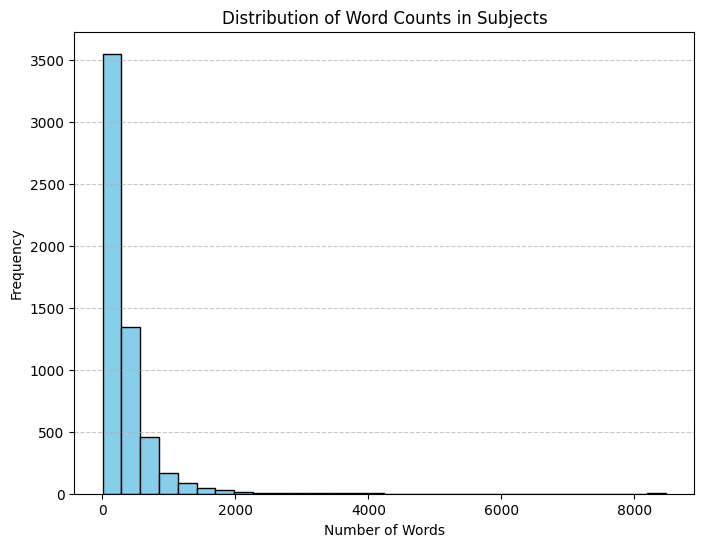

In [ ]:
# Plot word distribution before preprocessing
data_handler.plot_word_distribution()

### We see that there are a lot of words in each subject. So we need to remove a lot of words and do cleaning like lemmatization, stpword removal, punctuations. The code for the same is commented and defined clearly in the class defintions above

In [ ]:
# Preprocess the data
preprocessor.data_preprocessing()

In [ ]:
# Update the data to the preprocessed data
data_handler.data = preprocessor.data

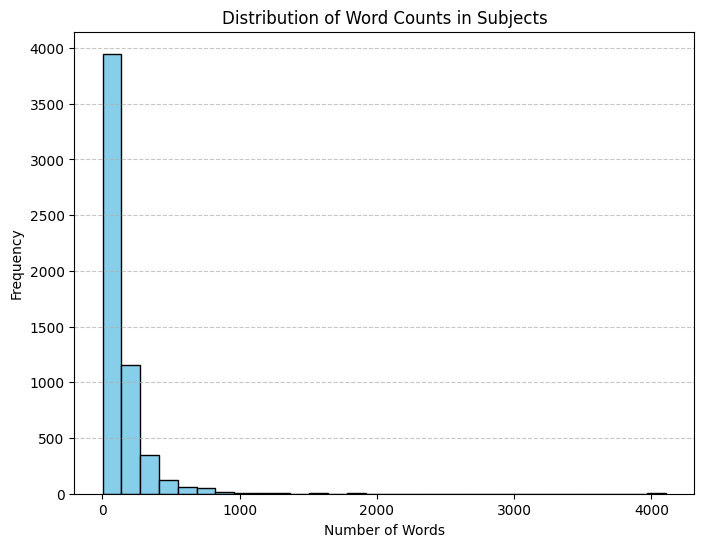

In [ ]:
# Plot word distribution after preprocessing
data_handler.plot_word_distribution()

### The preprocessing has significantly reduced the number of words in the subjects

In [ ]:
# Split the data into train, test, and validation sets
train_data, test_data, val_data = data_handler.split_data()

In [ ]:
# Save the datasets
train_data.to_csv('assignment-1/Data/processed/train.csv', index=False)
test_data.to_csv('assignment-1/Data/processed/test.csv', index=False)
val_data.to_csv('assignment-1/Data/processed/validation.csv', index=False)